## Fit a hexagonal lattice to a square of size s in two orientations

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from math import sqrt, floor, ceil

def hexagons_in_square_s(s, orientation, c, alpha):
    # Assume a side length of 1 for simplicity, but this can be changed
    L = 1

    if orientation == 'pointy':
        # Distance between two rows of pointy hexagons
        horizontal_dist = sqrt(3) * L
        vertical_dist = 3 * L / 2
    elif orientation == 'flat':
        # Distance between two rows of flat hexagons
        horizontal_dist = 3 * L / 2
        vertical_dist = sqrt(3) * L
    else:
        raise ValueError("Invalid orientation. Choose 'pointy' or 'flat'.")

    # Number of hexagons fitting along the horizontal and vertical axes
    n_horizontal = ceil(s / horizontal_dist)
    n_vertical = ceil(s / vertical_dist)
    
    print (f"Number of hexagons in a row of square with {orientation} orientation: {n_horizontal}")
    print (f"Number of hexagons in a column of square with {orientation} orientation: {n_vertical}")
    
    n_hexagons = n_horizontal * n_vertical
    print(f"Number of hexagons in a {s}x{s} square with {orientation} orientation: {n_hexagons}")

    fig, ax = plt.subplots()
    for i in range(n_vertical):
        for j in range(n_horizontal):
            if orientation == 'flat':
                x_offset = j * horizontal_dist
                y_offset = i * vertical_dist + (j % 2) * (vertical_dist / 2)
            elif orientation == 'pointy':
                x_offset = j * horizontal_dist + (i % 2) * (horizontal_dist / 2)
                y_offset = i * vertical_dist

            hexagon = RegularPolygon(
                (x_offset, y_offset), 
                numVertices=6, 
                radius=L, 
                orientation=np.pi / 6 if orientation == 'flat' else 0, 
                edgecolor='black',
                facecolor= c, 
                alpha = alpha
            )
            ax.add_patch(hexagon)

    ax.set_xlim(0, s)
    ax.set_ylim(0, s)
    ax.set_aspect('equal')
    plt.title(f"Hexagons in a {s}x{s} square - {orientation.capitalize()} Orientation")
    plt.grid(True)
    plt.show()



Number of hexagons in a row of square with pointy orientation: 7
Number of hexagons in a column of square with pointy orientation: 8
Number of hexagons in a 12x12 square with pointy orientation: 56


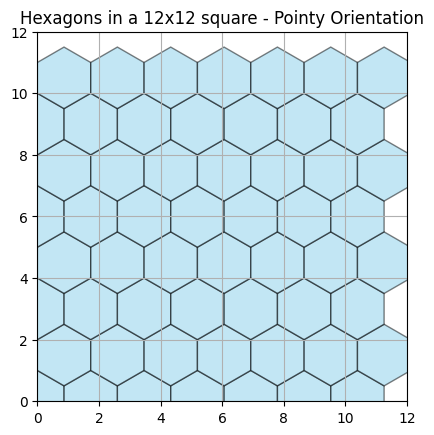

In [15]:
hexagons_in_square_s(12, 'pointy', 'Skyblue', 0.5)


Number of hexagons in a row of square with flat orientation: 8
Number of hexagons in a column of square with flat orientation: 7
Number of hexagons in a 12x12 square with flat orientation: 56


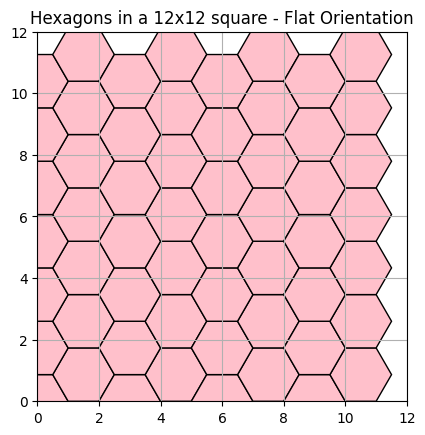

In [16]:
hexagons_in_square_s(12, 'flat', 'pink', 1)


## Fit a hexagonal lattice to a square based on Area of the cells

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from math import sqrt, floor, ceil

def hexagons_in_square_A(s, A, orientation, c, alpha):
    # Calculate the side length from the area
    L = sqrt(2 * A / (3 * sqrt(3)))
    
    if orientation == 'pointy':
        # Distance between two rows of pointy hexagons
        horizontal_dist = sqrt(3) * L
        vertical_dist = 3 * L / 2
    elif orientation == 'flat':
        # Distance between two rows of flat hexagons
        horizontal_dist = 3 * L / 2
        vertical_dist = sqrt(3) * L
    else:
        raise ValueError("Invalid orientation. Choose 'pointy' or 'flat'.")

    # Number of hexagons fitting along the horizontal and vertical axes
    #if orientation == 'pointy':
    #    n_horizontal = ceil(s / horizontal_dist)
    #    n_vertical = floor(s / vertical_dist)
    #elif orientation == 'flat':
    #    n_horizontal = ceil(s / horizontal_dist)
    #    n_vertical = floor(s / vertical_dist)
    n_horizontal = floor(s / horizontal_dist)
    n_vertical = floor(s / vertical_dist)
    print(f"Side length of each hexagon: {L:.2f}")
    print(f"Number of hexagons in a row of square with {orientation} orientation: {n_horizontal}")
    print(f"Number of hexagons in a column of square with {orientation} orientation: {n_vertical}")
    
    n_hexagons = n_horizontal * n_vertical
    print(f"Number of hexagons in a {s}x{s} square with {orientation} orientation: {n_hexagons}")

    fig, ax = plt.subplots()
    for i in range(n_vertical):
        for j in range(n_horizontal):
            if orientation == 'flat':
                x_offset = j * horizontal_dist
                y_offset = i * vertical_dist + (j % 2) * (vertical_dist / 2)
            elif orientation == 'pointy':
                x_offset = j * horizontal_dist + (i % 2) * (horizontal_dist / 2)
                y_offset = i * vertical_dist

            hexagon = RegularPolygon(
                (x_offset, y_offset), 
                numVertices=6, 
                radius=L, 
                orientation=np.pi / 6 if orientation == 'flat' else 0, 
                edgecolor='black',
                facecolor= c, 
                alpha= alpha
            )
            ax.add_patch(hexagon)

    ax.set_xlim(0, s)
    ax.set_ylim(0, s)
    ax.set_aspect('equal')
    plt.title(f"Hexagons in a {s}x{s} square - {orientation.capitalize()} Orientation")
    plt.grid(True)
    plt.show()



Side length of each hexagon: 2.63
Number of hexagons in a row of square with flat orientation: 25
Number of hexagons in a column of square with flat orientation: 21
Number of hexagons in a 99x99 square with flat orientation: 525


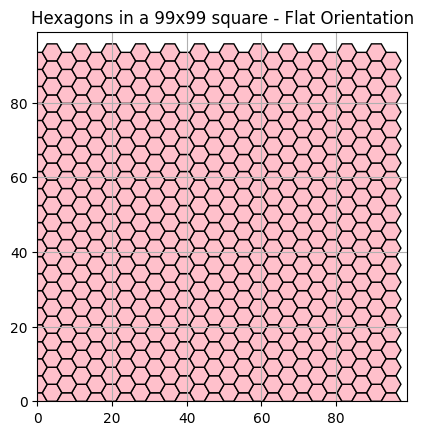

In [18]:
hexagons_in_square_A(99, 18, 'flat', 'pink', 1)


Side length of each hexagon: 2.63
Number of hexagons in a row of square with flat orientation: 25
Number of hexagons in a column of square with flat orientation: 21
Number of hexagons in a 99x99 square with flat orientation: 525


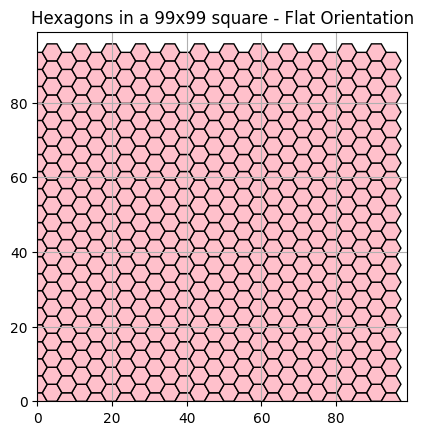

In [19]:
hexagons_in_square_A(99, 18, 'flat', 'pink', 1)



Side length of each hexagon: 2.28
Number of hexagons in a row of square with pointy orientation: 25
Number of hexagons in a column of square with pointy orientation: 28
Number of hexagons in a 99x99 square with pointy orientation: 700


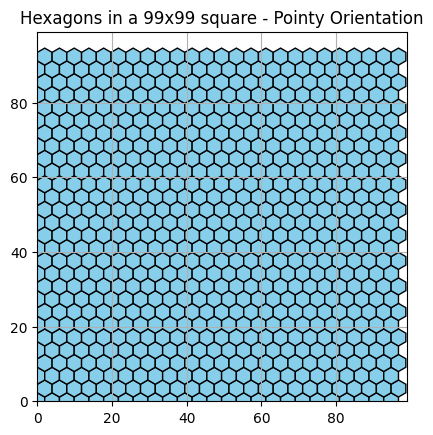

In [20]:
hexagons_in_square_A(99, 18 * 0.75, 'pointy', 'Skyblue', 1)


Side length of each hexagon: 4.56
Number of hexagons in a row of square with pointy orientation: 24
Number of hexagons in a column of square with pointy orientation: 28
Number of hexagons in a 192x192 square with pointy orientation: 672


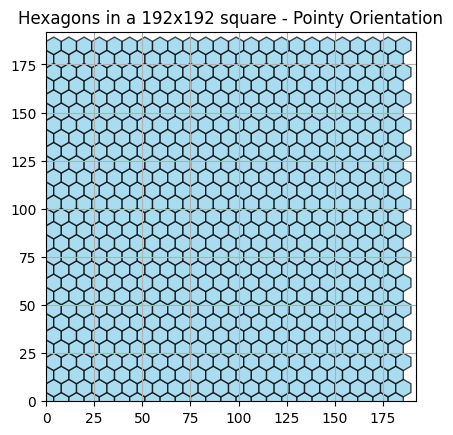

In [21]:
hexagons_in_square_A(192, 18*3, 'pointy', 'Skyblue', 0.7)

## Overlay lattices of different sizes and orientations

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from math import sqrt, ceil

def hexagons_in_square(ax, s, A, orientation, color):
    # Calculate the side length from the area
    L = sqrt(2 * A / (3 * sqrt(3)))
    
    if orientation == 'pointy':
        # Distance between two rows of pointy hexagons
        horizontal_dist = sqrt(3) * L
        vertical_dist = 3 * L / 2
    elif orientation == 'flat':
        # Distance between two rows of flat hexagons
        horizontal_dist = 3 * L / 2
        vertical_dist = sqrt(3) * L
    else:
        raise ValueError("Invalid orientation. Choose 'pointy' or 'flat'.")

    # Number of hexagons fitting along the horizontal and vertical axes
    n_horizontal = ceil(s / horizontal_dist)
    n_vertical = ceil(s / vertical_dist)
    
    print(f"Side length of each hexagon: {L:.2f}")
    print(f"Number of hexagons with area {A}mm^2 in a row with {orientation} orientation: {n_horizontal}")
    print(f"Number of hexagons with area {A}mm^2 in a column with {orientation} orientation: {n_vertical}")
    
    # Total number of hexagons
    n_hexagons = n_horizontal * n_vertical
    
    # Print the number of hexagons
    print(f"Number of hexagons in a {s}x{s} square with {orientation} orientation: {n_hexagons}")

    # Plotting hexagons
    for i in range(n_vertical):
        for j in range(n_horizontal):
            if orientation == 'flat':
                x_offset = j * horizontal_dist
                y_offset = i * vertical_dist + (j % 2) * (vertical_dist / 2)
            elif orientation == 'pointy':
                x_offset = j * horizontal_dist + (i % 2) * (horizontal_dist / 2)
                y_offset = i * vertical_dist

            hexagon = RegularPolygon(
                (x_offset, y_offset), 
                numVertices=6, 
                radius=L, 
                orientation=np.pi / 6 if orientation == 'flat' else 0, 
                edgecolor='black',
                facecolor=color,
                alpha=0.5
            )
            ax.add_patch(hexagon)

    
def overlay_hexagonal_lattices(s, A1, A2, ori1, ori2):
    fig, ax = plt.subplots(figsize= [10,10])

    # Plot first lattice
    hexagons_in_square(ax, s, A1, ori1, 'Skyblue')

    # Plot second lattice (on top)
    hexagons_in_square(ax, s, A2, ori2, 'pink')

    ax.set_xlim(0, s)
    ax.set_ylim(0, s)
    ax.set_aspect('equal')
    #plt.title(f"Overlay of Two Hexagonal Lattices - {ori1.capitalize()} Orientation")
    plt.grid(True)
    plt.show()


## Model For S=3

Side length of each hexagon: 4.56
Number of hexagons with area 54mm^2 in a row with pointy orientation: 7
Number of hexagons with area 54mm^2 in a column with pointy orientation: 8
Number of hexagons in a 49x49 square with pointy orientation: 56
Side length of each hexagon: 2.63
Number of hexagons with area 18mm^2 in a row with flat orientation: 13
Number of hexagons with area 18mm^2 in a column with flat orientation: 11
Number of hexagons in a 49x49 square with flat orientation: 143


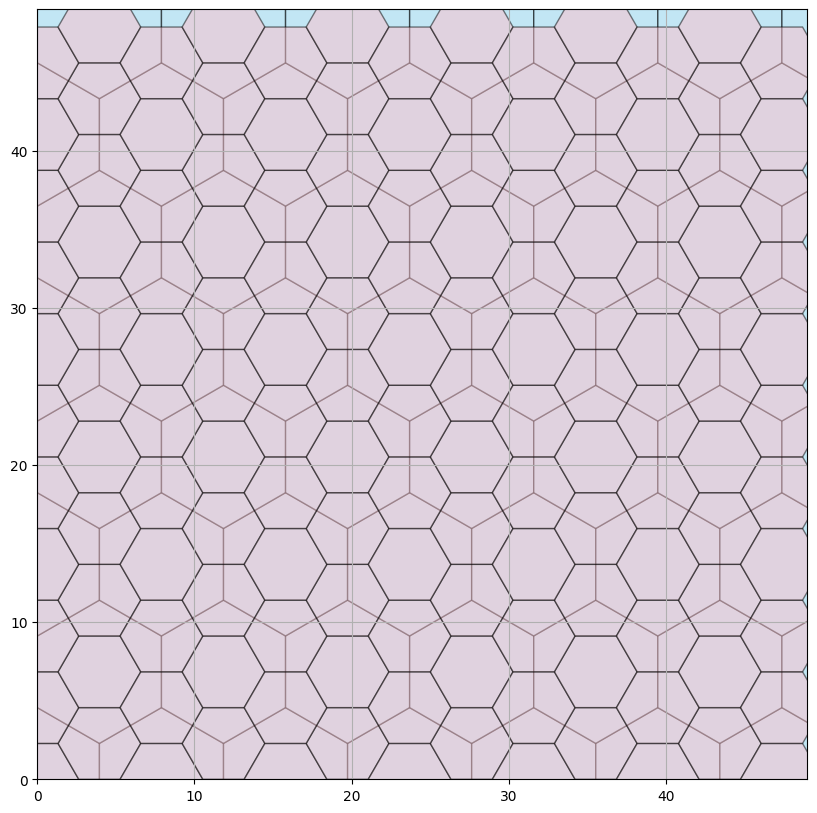

In [31]:
overlay_hexagonal_lattices(49, 18*3, 18, 'pointy', 'flat')

## Model For S=2

Side length of each hexagon: 3.72
Number of hexagons with area 36mm^2 in a row with flat orientation: 9
Number of hexagons with area 36mm^2 in a column with flat orientation: 8
Number of hexagons in a 49x49 square with flat orientation: 72
Side length of each hexagon: 2.63
Number of hexagons with area 18mm^2 in a row with flat orientation: 13
Number of hexagons with area 18mm^2 in a column with flat orientation: 11
Number of hexagons in a 49x49 square with flat orientation: 143


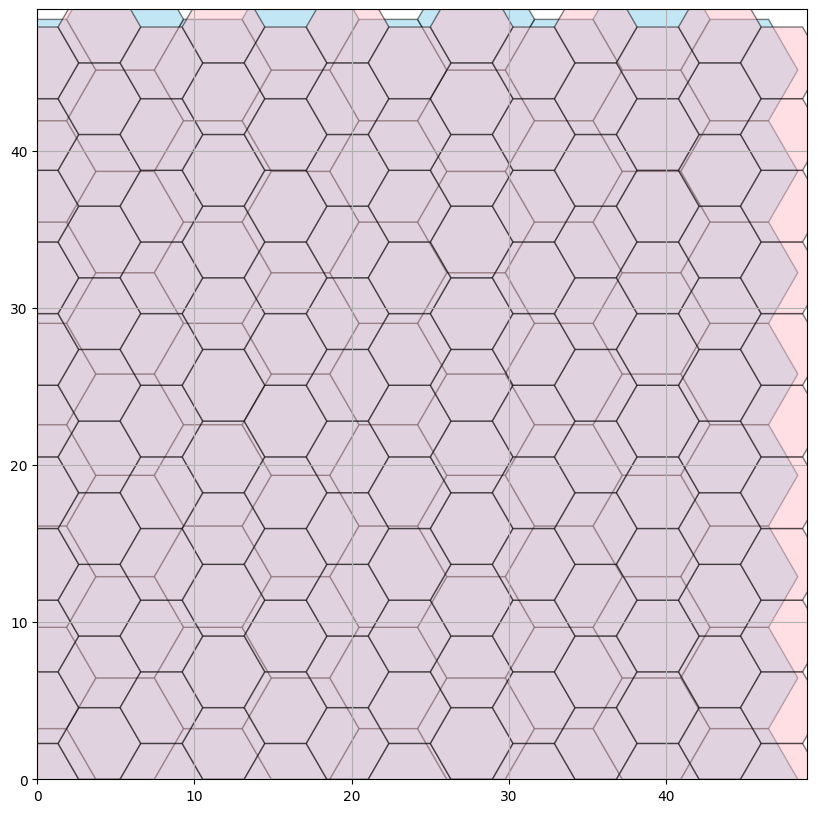

In [32]:
overlay_hexagonal_lattices(49, 18*2, 18, 'flat', 'flat')


## Model For S=0.75

Side length of each hexagon: 2.28
Number of hexagons with area 13.5mm^2 in a row with flat orientation: 15
Number of hexagons with area 13.5mm^2 in a column with flat orientation: 13
Number of hexagons in a 49x49 square with flat orientation: 195
Side length of each hexagon: 2.63
Number of hexagons with area 18mm^2 in a row with flat orientation: 13
Number of hexagons with area 18mm^2 in a column with flat orientation: 11
Number of hexagons in a 49x49 square with flat orientation: 143


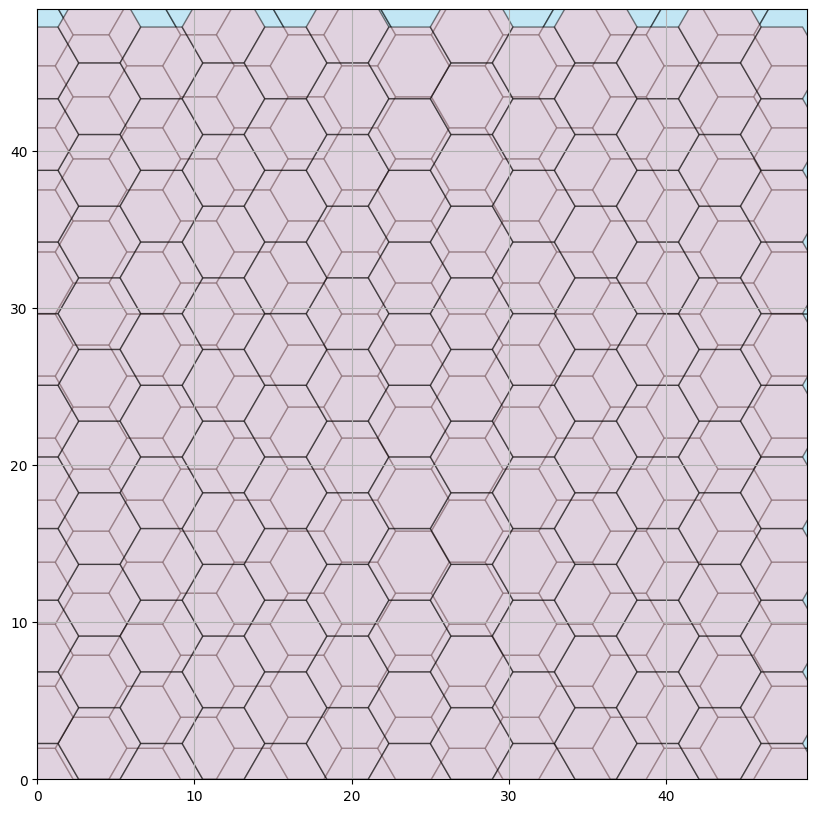

In [34]:
overlay_hexagonal_lattices(49, 18 * 0.75, 18, 'flat', 'flat')

## Calculate the amount of wax required for different configurations

In [35]:
from math import sqrt, ceil

def calculate_wax_required_corrected(wall_thickness, height, area, num_cells, s, orientation):
    L = sqrt(2 * area / (3 * sqrt(3)))

    # Calculate distances based on orientation
    if orientation == 'pointy':
        horizontal_dist = sqrt(3) * L
        vertical_dist = 3 * L / 2
    elif orientation == 'flat':
        horizontal_dist = 3 * L / 2
        vertical_dist = sqrt(3) * L
    else:
        raise ValueError("Invalid orientation. Choose 'pointy' or 'flat'.")

    # perimeter of a single hexagon
    perimeter = 6 * L
    
    # Calculate the wax volume for the walls, considering only boundary walls and account for shared walls
    
    # number of hexagons fitting along the horizontal and vertical axes
    n_horizontal = ceil(s / horizontal_dist)
    n_vertical = ceil(s / vertical_dist)
    
    # Cells at the boundaries will have full perimeter; internal cells share walls
    
    # Number of boundary cells
    n_boundary_cells = (n_horizontal + n_vertical - 2) * 2

    # Internal cells
    n_internal_cells = num_cells - n_boundary_cells

    # Wax for boundary cells (full perimeter)
    wax_boundary_cells = n_boundary_cells * perimeter * wall_thickness * height

    # Wax for internal cells (sharing walls), each wall is shared with a neighboring cell
    wax_internal_cells = n_internal_cells * (perimeter / 2) * wall_thickness * height

    total_wax_volume = wax_boundary_cells + wax_internal_cells
    
    return total_wax_volume



In [36]:
wall_thickness = 0.1  # in cm
height = 1.5  # in cm
area = 18  # in mm^2
s = 49  # square side length
orientation = 'flat'  # 'pointy' or 'flat'
num_cells = 143

# Convert area to cm^2 (1 mm^2 = 0.01 cm^2)
area_cm2 = area * 0.01

total_wax_1 = calculate_wax_required_corrected(wall_thickness, height, area_cm2, num_cells, s, orientation)
print(f"Total wax required to build 1x ({num_cells} cells): {total_wax_1:.2f} cm^3")



Total wax required to build 1x (143 cells): 71.66 cm^3


## Adapting the structure built on 3D-printed cells with S=3 to S=1

In [37]:
wall_thickness = 0.1  # in cm
height = 1.5  # in cm
area = 18 * 3  # in mm^2
s = 49  # square side length
orientation = 'pointy'  # 'pointy' or 'flat'
num_cells = 86

# Convert area to cm^2 (1 mm^2 = 0.01 cm^2)
area_cm2 = area * 0.01

total_wax_3 = calculate_wax_required_corrected(wall_thickness, height, area_cm2, num_cells, s, orientation )
print(f"Total wax required to build 3x larger ({num_cells} cells): {total_wax_3:.2f} cm^3")



Total wax required to build 3x larger (86 cells): 72.21 cm^3


In [38]:
total_wax_3 / total_wax_1

1.0077386516764382

In [39]:
print ('Adapting 3x to 1x, bees get {:.2f} times more cells, using only {:.2f}% more wax.'.format((143/86), ((total_wax_3 / total_wax_1)-1)))


Adapting 3x to 1x, bees get 1.66 times more cells, using only 0.01% more wax.


## Adapting the structure built on 3D-printed cells with S=2 to S=1

In [40]:
num_cells=72
total_wax_2 = calculate_wax_required_corrected(0.1, 1.5, 18 * 2 * 0.01, num_cells, 49, 'flat' )
print(f"Total wax required to build 2x larger {num_cells} cells: {total_wax_2:.2f} cm^3")



Total wax required to build 2x larger 72 cells: 66.33 cm^3


In [41]:
total_wax_2 / total_wax_1

0.9256670590078441

In [44]:
print (f"Using the 2x larger 3D-printed founcdations, bees spent {(1 - (total_wax_2 / total_wax_1))*100 :.2f}% less wax compared to filling the same space with 1x cells.")
       

Using the 2x larger 3D-printed founcdations, bees spent 7.43% less wax compared to filling the same space with 1x cells.


## Adapting the structure built on 3D-printed cells with S=0.75 to S=1

In [52]:
num_cells=195
total_wax_075 = calculate_wax_required_corrected(0.1, 1.5, 18 * 0.75 * 0.01, num_cells, 49, 'flat' )
print(f"Total wax required to build 0.75x larger {num_cells} cells: {total_wax_075:.2f} cm^3.")



Total wax required to build 0.75x larger 195 cells: 74.78 cm^3.


In [46]:
total_wax_075 / total_wax_1

1.0435248253865388

In [51]:
print ('Adapting 3D-printed foundation of 0.75x to 1x, the bees get ~{:.2f} times fewer cells, using {:.2f} more wax to build their comb.'.format((143/196), (total_wax_075 / total_wax_1)-1))


Adapting 3D-printed foundation of 0.75x to 1x, the bees get ~0.73 times fewer cells, using 0.04 more wax to build their comb.
